In [ ]:
# Install via pip
%pip install h3
%pip install folium

In [ ]:
# Verify installation
import h3
print(h3.__version__)  # Output: 4.1.0 (or latest version)

In [ ]:
import folium
import h3

base_cell = '8001fffffffffff'  # Resolution 0 pentagon
children = h3.cell_to_children(base_cell, res=1)

# Create a map centered at the center of the base hexagon
base_center = h3.cell_to_latlng(base_cell)
GeoSpatialMap = folium.Map(location=[base_center[0], base_center[1]], zoom_start=9)

# Function to get hexagon boundaries
def get_hexagon_bounds(h3_address):
    boundaries = h3.cell_to_boundary(h3_address)
    # Folium expects coordinates in [lat, lon] format
    return [[lat, lng] for lat, lng in boundaries]

# Add base hexagon
folium.Polygon(
    locations=get_hexagon_bounds(base_cell),
    color='red',
    fill=True,
    weight=2,
    popup=f'Base: {base_cell}'
).add_to(GeoSpatialMap)

# Add children hexagons
for child in children:
    folium.Polygon(
        locations=get_hexagon_bounds(child),
        color='blue',
        fill=True,
        weight=1,
        popup=f'Child: {child}'
    ).add_to(GeoSpatialMap)

GeoSpatialMap

In [ ]:
delhi_cell = h3.latlng_to_cell(28.6139, 77.2090, 9)  # New Delhi coordinates

# Traverse hierarchy upwards
parent = h3.cell_to_parent(delhi_cell, res=8)
print(f"Parent at res 8: {parent}")

# Traverse hierarchy downwards
children = h3.cell_to_children(parent, res=9)
print(f"Contains {len(children)} children")

# Create a new map centered on New Delhi
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=15)

# Add the parent hexagon (resolution 8)
folium.Polygon(
    locations=get_hexagon_bounds(parent),
    color='red',
    fill=True,
    weight=2,
    popup=f'Parent: {parent}'
).add_to(delhi_map)

# Add all children hexagons (resolution 9)
for child_cell in children:
    color = 'yellow' if child_cell == delhi_cell else 'blue'
    folium.Polygon(
        locations=get_hexagon_bounds(child_cell),
        color=color,
        fill=True,
        weight=1,
        popup=f'Child: {child_cell}'
    ).add_to(delhi_map)

delhi_map

In [ ]:
import h3

# Convert coordinates to H3 index (resolution 9)
lat, lng = 37.7749, -122.4194  # San Francisco
h3_index = h3.latlng_to_cell(lat, lng, 9)
print(h3_index)  # '89283082803ffff'

# Deconstruct index components
# Get the resolution
resolution = h3.get_resolution(h3_index)
print(f"Resolution: {resolution}")
# Output: 9

# Get the base cell number
base_cell = h3.get_base_cell_number(h3_index)
print(f"Base cell: {base_cell}")
# Output: 20

# Check if it's a pentagon
is_pentagon = h3.is_pentagon(h3_index)
print(f"Is pentagon: {is_pentagon}")
# Output: False

# Get the icosahedron face
face = h3.get_icosahedron_faces(h3_index)
print(f"Face number: {face}")
# Output: [7]

# Get the child cells
child_cells = h3.cell_to_children(h3.cell_to_parent(h3_index, 8), 9)
print(f"child cells: {child_cells}")
# Output: ['89283082803ffff', '89283082807ffff', '8928308280bffff', '8928308280fffff', '89283082813ffff', '89283082817ffff', '8928308281bffff']

In [ ]:
import h3
import folium

# Define latitude, longitude for Kolkata
lat, lng = 22.5744, 88.3629
resolution = 9  # H3 resolution

# Convert lat/lng to H3 index
h3_index = h3.latlng_to_cell(lat, lng, resolution)

# Get neighboring hexagons
neighbors = h3.grid_disk(h3_index, k=1)

# Initialize map centered at the given location
m = folium.Map(location=[lat, lng], zoom_start=12)

# Function to add hexagons to the map
def add_hexagon(h3_index, color):
    """ Adds an H3 hexagon to the folium map """
    boundary = h3.cell_to_boundary(h3_index)
    # Convert to [lat, lng] format for folium
    boundary = [[lat, lng] for lat, lng in boundary]
    folium.Polygon(
        locations=boundary,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5
    ).add_to(m)

# Add central hexagon in red
add_hexagon(h3_index, "red")

# Add neighbor hexagons in blue
for neighbor in neighbors:
    if neighbor != h3_index:  # Avoid recoloring the center
        add_hexagon(neighbor, "blue")

# Display the map
m

In [ ]:
import h3  
import geopandas as gpd  
from shapely.geometry import Polygon  

# Define a polygon (e.g., San Francisco bounding box)  
polygon_coords = h3.LatLngPoly(
    [(37.708, -122.507), (37.708, -122.358), (37.832, -122.358), (37.832, -122.507)]
)

# Convert polygon to H3 cells (resolution 9)  
resolution = 9  
cells = h3.polygon_to_cells(polygon_coords, res=resolution)  
print(f"Total cells: {len(cells)}")  # Output: ~ 1651

In [ ]:
import h3
import folium
from h3 import LatLngPoly

# Define a bounding polygon for Kolkata
kolkata_coords = LatLngPoly([
    (22.4800, 88.2900),  # Southwest corner
    (22.4800, 88.4200),  # Southeast corner
    (22.5200, 88.4500),  # East
    (22.5700, 88.4500),  # Northeast
    (22.6200, 88.4200),  # North
    (22.6500, 88.3500),  # Northwest
    (22.6200, 88.2800),  # West
    (22.5500, 88.2500),  # Southwest
    (22.5000, 88.2700)   # Return to starting area
])
# Add more boundary coordinates for more specific map

# Convert polygon to H3 cells
resolution = 9
cells = h3.polygon_to_cells(kolkata_coords, res=resolution)

# Create a Folium map centered around Kolkata
kolkata_map = folium.Map(location=[22.55, 88.35], zoom_start=12)

# Add each H3 cell as a polygon
for cell in cells:
    boundaries = h3.cell_to_boundary(cell)
    # Convert to [lat, lng] format for folium
    boundaries = [[lat, lng] for lat, lng in boundaries]
    folium.Polygon(
        locations=boundaries,
        color='blue',
        weight=1,
        fill=True,
        fill_opacity=0.4,
        popup=cell
    ).add_to(kolkata_map)

# Show map
kolkata_map

In [ ]:
import h3
from h3 import latlng_to_cell

# Define two H3 cells at resolution 9  
cell_a = latlng_to_cell(37.7749, -122.4194, 9)  # San Francisco  
cell_b = latlng_to_cell(37.3382, -121.8863, 9)  # San Jose  

# Calculate grid distance  
distance = h3.grid_distance(cell_a, cell_b)  
print(f"Grid distance: {distance} steps")  
# Output: Grid distance: 30 steps (approx)

In [ ]:
import h3
import folium
from h3 import latlng_to_cell
from shapely.geometry import Polygon

# Function to get H3 polygon boundary
def get_h3_polygon(h3_index):
    boundary = h3.cell_to_boundary(h3_index)
    return [(lat, lon) for lat, lon in boundary]

# Define two H3 cells at resolution 6
cell_a = latlng_to_cell(37.7749, -122.4194, 6)  # San Francisco
cell_b = latlng_to_cell(37.3382, -121.8863, 6)  # San Jose

# Get hexagon boundaries
polygon_a = get_h3_polygon(cell_a)
polygon_b = get_h3_polygon(cell_b)

# Compute grid distance
distance = h3.grid_distance(cell_a, cell_b)

# Create a folium map centered between the two locations
map_center = [(37.7749 + 37.3382) / 2, (-122.4194 + -121.8863) / 2]
m = folium.Map(location=map_center, zoom_start=9)

# Add H3 hexagons to the map
folium.Polygon(locations=polygon_a, color='blue', fill=True, fill_opacity=0.4, popup="San Francisco (H3)").add_to(m)
folium.Polygon(locations=polygon_b, color='red', fill=True, fill_opacity=0.4, popup="San Jose (H3)").add_to(m)

# Add markers for the center points
folium.Marker([37.7749, -122.4194], popup="San Francisco").add_to(m)
folium.Marker([37.3382, -121.8863], popup="San Jose").add_to(m)

# Display distance
folium.Marker(map_center, popup=f"H3 Grid Distance: {distance} steps", icon=folium.Icon(color='green')).add_to(m)

# Show the map
m


In [36]:
import h3  

# Define a central cell (San Francisco at resolution 9)  
central_cell = h3.latlng_to_cell(37.7749, -122.4194, 9)  
k = 2  

# Generate K-Ring (cells within 2 steps)  
k_ring = h3.grid_disk(central_cell, k)  
k_ring  # e.g., 19 cells  

['89283082803ffff',
 '8928308281bffff',
 '8928308280bffff',
 '8928308280fffff',
 '89283082807ffff',
 '89283082817ffff',
 '89283082813ffff',
 '892830828c7ffff',
 '892830828cfffff',
 '89283082857ffff',
 '89283082847ffff',
 '89283082873ffff',
 '89283082877ffff',
 '8928308283bffff',
 '89283082833ffff',
 '892830828abffff',
 '892830828bbffff',
 '8928308288fffff',
 '8928308288bffff']

Central H3 cell: 89283082803ffff
Total k-ring cells: 19


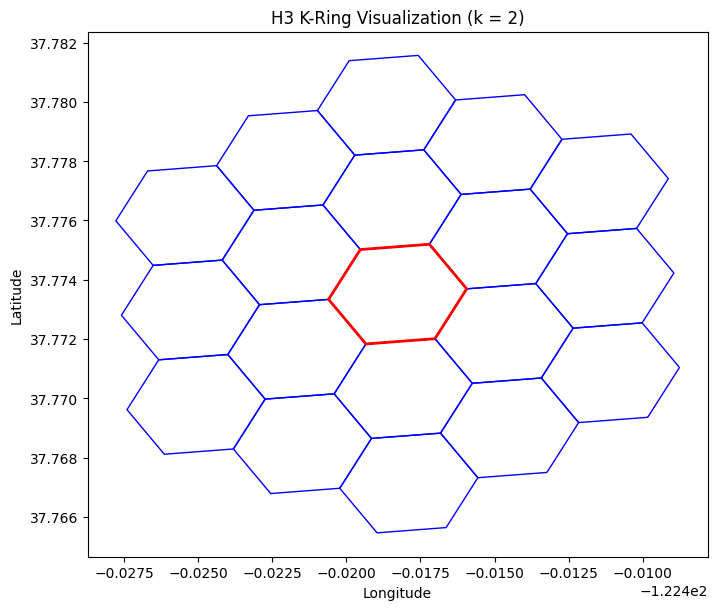

In [5]:
import h3
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd

# Define central point (latitude, longitude) for San Francisco [1]
lat, lng = 37.7749, -122.4194
resolution = 9  # Choose resolution (e.g., 9) [1]

# Obtain central H3 cell index for the given point [1]
center_h3 = h3.latlng_to_cell(lat, lng, resolution)
print("Central H3 cell:", center_h3)  # Example output: '89283082837ffff'

# Define k value (number of grid steps) for the k-ring [1]
k = 2

# Generate k-ring of cells: all cells within k grid steps of centerH3 [1]
k_ring_cells = h3.grid_disk(center_h3, k)
print("Total k-ring cells:", len(k_ring_cells))
# For a standard hexagon (non-pentagon), k=2 typically returns 19 cells:
# 1 (central cell) + 6 (neighbors at distance 1) + 12 (neighbors at distance 2)

# Convert each H3 cell into a Shapely polygon for visualization [1][6]
polygons = []
for cell in k_ring_cells:
    # Get the cell boundary as a list of (lat, lng) pairs; geo_json=True returns in [lat, lng]
    boundary = h3.cell_to_boundary(cell)
    # Swap to (lng, lat) because Shapely expects (x, y)
    poly = Polygon([(lng, lat) for lat, lng in boundary])
    polygons.append(poly)

# Create a GeoDataFrame for plotting the hexagonal cells [2]
gdf = gpd.GeoDataFrame({'h3_index': list(k_ring_cells)}, geometry=polygons)

# Plot the boundaries of the k-ring cells using Matplotlib [2][6]
fig, ax = plt.subplots(figsize=(8, 8))
gdf.boundary.plot(ax=ax, color='blue', lw=1)

# Highlight the central cell by plotting its boundary in red [1]
central_boundary = h3.cell_to_boundary(center_h3)
central_poly = Polygon([(lng, lat) for lat, lng in central_boundary])
gpd.GeoSeries([central_poly]).boundary.plot(ax=ax, color='red', lw=2)

# Set plot labels and title for clear visualization
ax.set_title("H3 K-Ring Visualization (k = 2)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


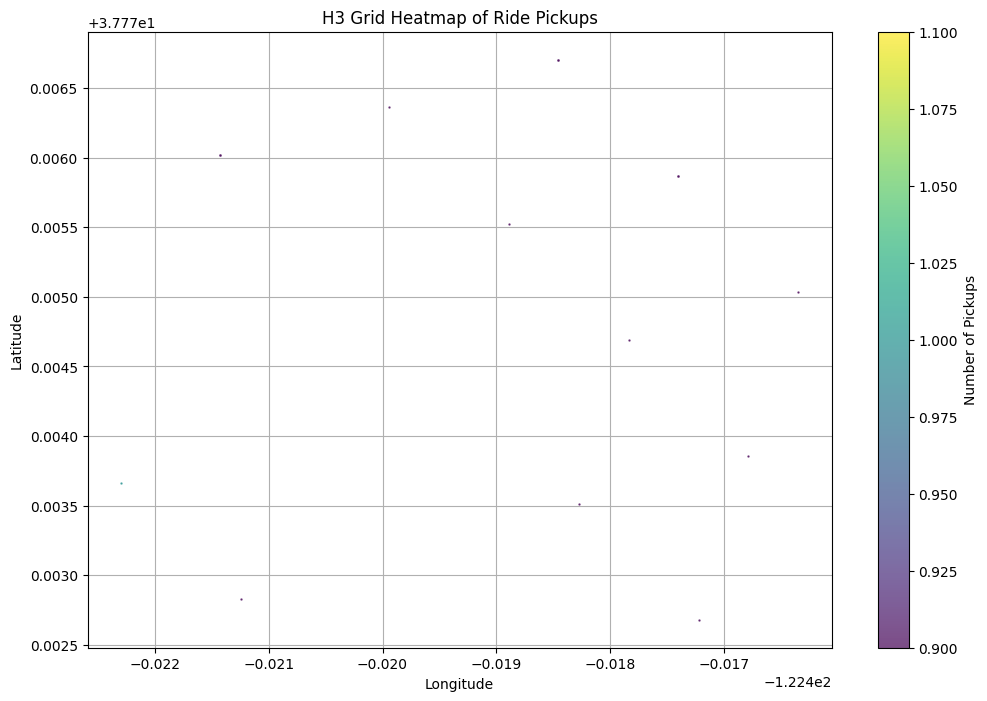

In [8]:
import pandas as pd
import h3
import folium
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import random

# Create sample GPS data around San Francisco
# Center coordinates for San Francisco
center_lat, center_lng = 37.7749, -122.4194

# Generate synthetic ride data
num_rides = 1000
np.random.seed(42)  # For reproducibility

# Generate random coordinates around San Francisco
lats = np.random.normal(center_lat, 0.02, num_rides)  # Normal distribution around center
lngs = np.random.normal(center_lng, 0.02, num_rides)

# Generate timestamps for the past week
start_time = datetime.now() - timedelta(days=7)
timestamps = [start_time + timedelta(minutes=random.randint(0, 10080)) for _ in range(num_rides)]
timestamp_strs = [ts.strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

# Create DataFrame
rides = pd.DataFrame({
    'lat': lats,
    'lng': lngs,
    'timestamp': timestamp_strs
})

# Convert coordinates to H3 indexes (resolution 10)
rides["h3"] = rides.apply(
    lambda row: h3.latlng_to_cell(row["lat"], row["lng"], 10), axis=1  
)

# Count pickups per cell
pickup_counts = rides["h3"].value_counts().reset_index()
pickup_counts.columns = ["h3", "counts"]

# Query pickups within a specific cell and its neighbors 
target_cell = h3.latlng_to_cell(37.7749, -122.4194, 10)
neighbors = h3.grid_disk(target_cell, k=2)
local_pickups = pickup_counts[pickup_counts["h3"].isin(neighbors)]

# Visualize the spatial query results
map_center = h3.cell_to_latlng(target_cell)
m = folium.Map(location=map_center, zoom_start=15)

# Function to get hexagon boundaries
def get_hexagon_bounds(h3_address):
    boundaries = h3.cell_to_boundary(h3_address)
    return [[lat, lng] for lat, lng in boundaries]

# Add target cell
folium.Polygon(
    locations=get_hexagon_bounds(target_cell),
    color='red',
    fill=True,
    weight=2,
    popup=f'Target Cell: {target_cell}'
).add_to(m)

# Color scale for counts
max_count = local_pickups["counts"].max()
min_count = local_pickups["counts"].min()

# Add neighbor cells with color intensity based on pickup counts
for _, row in local_pickups.iterrows():
    if row["h3"] != target_cell:
        # Calculate color intensity based on count
        intensity = (row["counts"] - min_count) / (max_count - min_count) if max_count > min_count else 0.5
        color = f'#{int(255*(1-intensity)):02x}{int(200*(1-intensity)):02x}ff'
        
        folium.Polygon(
            locations=get_hexagon_bounds(row["h3"]),
            color=color,
            fill=True,
            fill_opacity=0.7,
            weight=1,
            popup=f'Cell: {row["h3"]}<br>Pickups: {row["counts"]}'
        ).add_to(m)

# Create a heatmap visualization with matplotlib
plt.figure(figsize=(12, 8))
plt.title("H3 Grid Heatmap of Ride Pickups")

# Create a scatter plot for cells, size based on pickup counts
for idx, row in local_pickups.iterrows():
    center = h3.cell_to_latlng(row["h3"])
    plt.scatter(center[1], center[0], s=row["counts"]/2, 
                c=row["counts"], cmap='viridis', alpha=0.7)

plt.colorbar(label='Number of Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Display both visualizations
m  # Display the folium map

In [19]:
import h3
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Conv1D, Dense

# Create sample GPS data around San Francisco
center_lat, center_lng = 37.7749, -122.4194
num_rides = 1000
np.random.seed(42)  # For reproducibility

# Generate random coordinates around San Francisco
lats = np.random.normal(center_lat, 0.02, num_rides)
lngs = np.random.normal(center_lng, 0.02, num_rides)

# Generate timestamps for the past week
start_time = datetime.now() - timedelta(days=7)
timestamps = [start_time + timedelta(minutes=random.randint(0, 10080)) for _ in range(num_rides)]
timestamp_strs = [ts.strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

# Generate random speed data
speeds = np.random.uniform(5, 60, num_rides)  # Speed in km/h

# Create DataFrame
gps_data = pd.DataFrame({
    'lat': lats,
    'lng': lngs,
    'timestamp': timestamp_strs,
    'speed': speeds
})

# Convert coordinates to H3 indexes (resolution 10)
gps_data["h3"] = gps_data.apply(
    lambda row: h3.latlng_to_cell(row["lat"], row["lng"], 10), axis=1
)

# Convert timestamp string to datetime objects
gps_data["timestamp"] = pd.to_datetime(gps_data["timestamp"])

# Aggregate speed and count per cell per 5-minute interval
agg_data = gps_data.groupby(["h3", pd.Grouper(key="timestamp", freq="5T")]).agg(
    avg_speed=("speed", "mean"),
    vehicle_count=("h3", "count")
).reset_index()

# Example: Use a cell from our existing dataset
sample_cell = gps_data["h3"].iloc[0]
neighbors = h3.grid_disk(sample_cell, 2)

def get_kring_features(cell, k=2):
    neighbors = h3.grid_disk(cell, k)
    return {f"neighbor_{i}": neighbor for i, neighbor in enumerate(neighbors)}

# Placeholder function for feature extraction
def fetch_features(neighbors, agg_data):
    # In a real implementation, this would fetch historical data for the neighbors
    # This is just a simplified example that returns random data
    return np.random.rand(1, 6, len(neighbors))  # 1 sample, 6 timesteps, features per neighbor

# Define a skeleton model architecture
def create_model(input_shape):
    model = tf.keras.Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prediction function (would use a trained model in practice)
def predict_congestion(cell, model, agg_data):
    # Fetch neighbor cells
    neighbors = h3.grid_disk(cell, k=2)
    # Get historical data for neighbors
    features = fetch_features(neighbors, agg_data)
    # Predict
    return model.predict(features)[0][0]

# Create a skeleton model (not trained)
input_shape = (6, 19)  # 6 time steps, 19 features (for k=2 neighbors)
model = create_model(input_shape)

# Print information about what would happen in a real prediction
print(f"Sample cell: {sample_cell}")
print(f"Number of neighboring cells (k=2): {len(neighbors)}")
print("Model summary:")
model.summary()

# In practice, you would train the model before using it for predictions
# This would just show what a prediction call would look like:
congestion_prob = predict_congestion(sample_cell, model, agg_data)
print(f"Congestion probability: {congestion_prob:.2%}")

Sample cell: 8a283082a187fff
Number of neighboring cells (k=2): 19
Model summary:


C:\Users\Kabyik\AppData\Local\Temp\ipykernel_10548\2286296495.py:43: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  agg_data = gps_data.groupby(["h3", pd.Grouper(key="timestamp", freq="5T")]).agg(
d:\Git-Hub Projects\DATA-ANALYSIS-PROJECTS\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 6, 64)          │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,465 (134.63 KB)

 Trainable params: 34,465 (134.63 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Congestion probability: 49.09%
